In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [71]:
#loading data set from sns
data=sns.load_dataset('titanic')

In [72]:
#displaying first five row using head function
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [73]:
#droping unwanted columns i.e which were not affecting our target var
data.drop(['class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],axis=1,inplace=True)
         

In [74]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [75]:
#counting the Null values accourding to columns 
data[data.isnull().any(axis=1)].count()

survived    179
pclass      179
sex         179
age           2
sibsp       179
parch       179
fare        179
embarked    177
dtype: int64

In [76]:
#removing the rows if it contains one null value
data=data.dropna()

In [77]:
data[data.isnull().any(axis=1)].count()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [78]:
#displays all statistical values
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [79]:
# Compute a simple cross tabulation or metrics of sex and servived col
pd.crosstab(data['sex'],data['survived'])


survived,0,1
sex,,
female,64,195
male,360,93


<AxesSubplot:>

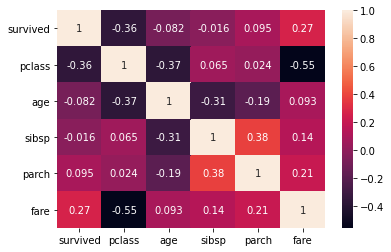

In [80]:
#corelation is the number (-1,1) which indicates the relation b/w 2 var
data_corr=data.corr()

sns.heatmap(data_corr,annot=True)

In [81]:
#importing the req packages
#the LabelEncoder converts the categorical val into ordered int val
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#fitting and transforming the classifier
data['sex']=encoder.fit_transform(data['sex'].astype(str))
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [82]:
# One-hot encoding ,categ val with no intrinsic
data=pd.get_dummies(data,columns=['embarked'])

In [83]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [84]:
data.to_csv("titanicclean.csv",index=False)

In [85]:
X=data.drop(['survived'],axis=1)

In [86]:
y=data['survived']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=80)
#penalty=l2 is default used by logreg model,C os strength of regularization 
#liblinear is used for small sets of data 

logreg=LogisticRegression(penalty='l2',C=1.0,solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
acc_score=accuracy_score(y_pred,y_test)
pre_score=precision_score(y_pred,y_test)
recal_score=recall_score(y_pred,y_test)
print(f"acc_score is:{acc_score}\npre_score is:{pre_score}\nrecl_score is:{recal_score}")



acc_score is:0.8321678321678322
pre_score is:0.7254901960784313
recl_score is:0.7872340425531915


In [55]:
conf_met=pd.crosstab(df.y_test,df.y_pred)
conf_met

y_pred,0,1
y_test,,
0,82,10
1,14,37


In [54]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[82 10]
 [14 37]]


### Linear regression model for Classsification model 

In [68]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#Importing the dataset
dataset = pd.read_csv("titanicclean.csv")
data = dataset.iloc[:,:]
 
#checking for null values
 
#separating the predicting column from the whole dataset
X = data.iloc[:, 1:].values
y = dataset.iloc[:, :1].values
 
#Encoding the predicting variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
 
#Splitting the data into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size = 0.4, random_state = 60)
 
#Using the Linear regression for the prediction
classifier=LinearRegression()
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)
 
test_set_rmse = (np.sqrt(mean_squared_error(y_test, predicted)))

test_set_r2 = r2_score(y_test, predicted)
print(test_set_rmse*100)
print(test_set_r2*100)

37.12974856594196
43.17554774403537


###### Accuracy (e.g. classification accuracy) is a measure for classification, 
not regression so we can't calculate accuracy for a regression model. For regression,
one of the matrices we've to get the score (ambiguously termed as accuracy) is R-squared (R2).

